# American Census

In [1]:
import numpy as np
import pandas as pd
import warnings

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import make_scorer

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"

# No warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

## Load data

In [3]:
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")

## Helpers

In [4]:
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),  
    "SVM": SVC(C=10, kernel="poly",random_state=42),
    "LogisticRegression": LogisticRegression(penalty="none", C=10, random_state=42),
}

labelingColumns = np.array([3,4,5,6,7,8,9,10])
def labeling(labeledColumn, colouringArray):
  for x in range(labeledColumn.first_valid_index(), labeledColumn.first_valid_index() + len(labeledColumn)):
    val = np.where(labeledColumn[x] == colouringArray)[0]
    if (len(val) == 0):
      val = -1
    else:
      val = val[0]
    labeledColumn[x]=val

def labelAll(X_train,labelingColumns):
  for x in labelingColumns:
    labelingColumn = X_train.iloc[:, x]
    colouringArray = np.unique(getattr(X_train, X_train.columns[x]).tolist())
    labeling(labelingColumn,colouringArray)
    #new_labeling(labelingColumn)
    print(labelingColumn)

def imputeX(X_train):
  global_imputer = SimpleImputer(strategy='most_frequent')
  X_train[:] = global_imputer.fit_transform(X_train)

## Data exploration

### Question 1

### Question 2

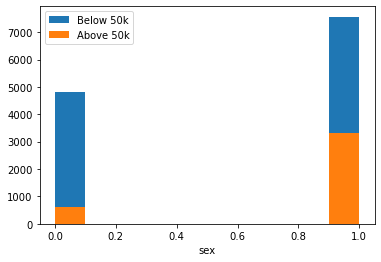

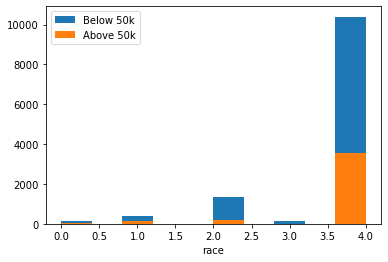

In [5]:
sex_index = getattr(X, X.columns[9]).tolist()

def sex_labeling(sex_index):
    sex = np.array([' Female', ' Male'])

    for x in range(0, len(sex_index)):
        val = np.where(sex_index[x] == sex)[0]
        if (len(val) == 0):
            val = -1
        else:
            val = val[0]
        sex_index[x] = val
    return sex_index

sex_index = np.array(sex_labeling(sex_index))
sex_index0 = np.where(y.values[:,0] == 0)
sex_index1 = np.where(y.values[:,0] == 1)

sex_index0 = sex_index[sex_index0[0]]
sex_index1 = sex_index[sex_index1[0]]

plt.hist(sex_index0, label="Below 50k")
plt.hist(sex_index1, label="Above 50k")
plt.xlabel(X.columns[9])
plt.legend()
plt.show()

race_index = getattr(X, X.columns[8]).tolist()

def race_labeling(race_index):
    race = np.array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White'])

    for x in range(0, len(race_index)):
        val = np.where(race_index[x] == race)[0]
        if (len(val) == 0):
            val = -1
        else:
            val = val[0]
        race_index[x] = val
    return race_index

race_index = np.array(race_labeling(race_index))
race_index0 = np.where(y.values[:,0] == 0)
race_index1 = np.where(y.values[:,0] == 1)

race_index0 = race_index[race_index0[0]]
race_index1 = race_index[race_index1[0]]

plt.hist(race_index0, label="Below 50k")
plt.hist(race_index1, label="Above 50k")
plt.xlabel(X.columns[8])
plt.legend()
plt.show()

## Data preparation

In [6]:
print(X.columns)
print(np.unique(getattr(X, X.columns[0]).tolist()))
print(np.unique(getattr(X, X.columns[1]).tolist()))
print(np.unique(getattr(X, X.columns[2]).tolist()))
print(np.unique(getattr(X, X.columns[3]).tolist()))
print(np.unique(getattr(X, X.columns[4]).tolist()))
print(np.unique(getattr(X, X.columns[5]).tolist()))
print(np.unique(getattr(X, X.columns[6]).tolist()))
print(np.unique(getattr(X, X.columns[7]).tolist()))
print(np.unique(getattr(X, X.columns[8]).tolist()))
print(np.unique(getattr(X, X.columns[9]).tolist()))
print(np.unique(getattr(X, X.columns[10]).tolist()))

Index(['age', 'education-num', 'hours-per-week', 'workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'native-country'],
      dtype='object')
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 90]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 na

### Question 1

In [7]:
imputeX(X)

### Question 2

In [8]:
labelAll(X,labelingColumns)

0        3
1        3
2        3
3        3
4        0
        ..
16275    3
16276    6
16277    6
16278    3
16279    3
Name: workclass, Length: 16280, dtype: object
0        11
1        15
2         7
3        15
4        15
         ..
16275     8
16276     9
16277    12
16278    11
16279     1
Name: education, Length: 16280, dtype: object
0        2
1        2
2        4
3        4
4        2
        ..
16275    2
16276    4
16277    0
16278    4
16279    2
Name: marital-status, Length: 16280, dtype: object
0        11
1         9
2         9
3         0
4        13
         ..
16275    13
16276     9
16277     3
16278     6
16279    13
Name: occupation, Length: 16280, dtype: object
0        3
1        0
2        4
3        1
4        5
        ..
16275    0
16276    1
16277    4
16278    1
16279    0
Name: relationship, Length: 16280, dtype: object
0        1
1        4
2        2
3        4
4        4
        ..
16275    4
16276    4
16277    4
16278    4
16279    4
Name: race, L

### Question 3

In [9]:
X = X.drop(X.columns[[8,9]], axis = 1)

scaler = preprocessing.Normalizer()
scalerX = scaler.fit(X)
X = scalerX.transform(X)

## Experiments

### Question 1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.143, random_state=42, shuffle=False)

### Question 2

In [11]:
random_state = 42
scoring_method_f1 = make_scorer(lambda true_target, prediction: f1_score(true_target, prediction, average="weighted"))
scoring_method_accuracy = make_scorer(lambda true_target,  prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "GaussianNB": {
    
    },
    "DecisionTreeClassifier": {
        'random_state': [42],
        'max_depth': [None],
        'min_samples_leaf':[2]
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3],
        'weights': ["distance"]
    },
    "LogisticRegression": {
        'C': [10],
        'random_state': [42],
        'penalty' : ["none"]

    },
    "SVM": {
        'C': [10],
        'random_state': [42],
        'kernel': ["poly"]
    },
    
}

n_splits = 7

fvals = []
avals = []
names = []

for model_name, parameters in model_parameters.items():

    names.append(model_name)
    model = models[model_name]
    
    cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search_F1 = GridSearchCV(model, parameters, cv=cv, verbose=False, scoring=scoring_method_f1).fit(X, np.ravel(y))
    grid_search_accuracy = GridSearchCV(model, parameters, cv=cv, verbose=False, scoring=scoring_method_accuracy).fit(X, np.ravel(y))

    best_F1_model = grid_search_F1.best_estimator_
    best_F1_score = grid_search_F1.best_score_

    best_accuracy_model = grid_search_accuracy.best_estimator_
    best_accuracy_score = grid_search_accuracy.best_score_
    
    print(model_name)
    print("- best_F1_score =", best_F1_score)
    print("- best_accuracy_score =", best_accuracy_score)

    fvals.append(best_F1_score)
    avals.append(best_accuracy_score)
    

GaussianNB
- best_F1_score = 0.7823645403704786
- best_accuracy_score = 0.7722974245588176
DecisionTreeClassifier
- best_F1_score = 0.7731488899248975
- best_accuracy_score = 0.7789928583976236
KNeighborsClassifier
- best_F1_score = 0.7746232202935378
- best_accuracy_score = 0.7757368054702534
LogisticRegression
- best_F1_score = 0.7747031025401246
- best_accuracy_score = 0.7974200416582465
SVM
- best_F1_score = 0.7908767665565236
- best_accuracy_score = 0.8074322062888895


Best Result with Default Hyper Parameters:

split = 7

SVM
- best_F1_score = 0.7908767665565236
- best_accuracy_score = 0.8074322062888895

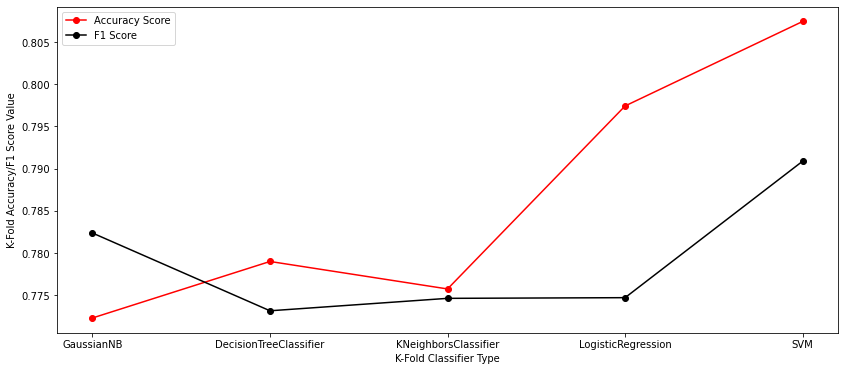

In [12]:
plt.figure(figsize=(14,6))
kf = plt.subplot(1,1,1)

kf.set_xlabel("K-Fold Classifier Type")
kf.set_ylabel("K-Fold Accuracy/F1 Score Value")

kf.plot(names, avals, label="Accuracy Score", color="red", marker='o')
kf.plot(names, fvals, label="F1 Score", color="black", marker='o')

plt.legend()
plt.show()

In [13]:
#***********
#THIS METHOD IS WITHOUT KFOLD, AND THUS OVERFITS TO SHOW HIGHER RESULTS FOR THE PERFORMANCE METRICS, NO NEED TO RUN THIS ONE. IT IS ONLY HERE SO THE OVERFIT CAN BE OBSERVED AND COMPARED.
#***********
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),  
    "SVM": SVC(C=10, kernel="poly",random_state=42),
    "LogisticRegression": LogisticRegression(penalty="none", C=10, random_state=42, max_iter = 10000),
}

for name, model in models.items():
    model.fit(X_train,np.ravel(y_train,order='C'))
    prediction = model.predict(X_test)
    print(name)
    f1_score_value = f1_score(prediction, y_test, average="weighted")
    accuracy = accuracy_score(prediction, y_test)
    print("   - accuracy_score", accuracy)
    print("   - f1_score", f1_score_value)

GaussianNB
   - accuracy_score 0.7891799055388579
   - f1_score 0.7810217355184073
DecisionTreeClassifier
   - accuracy_score 0.798626019750966
   - f1_score 0.8063880598843786
KNeighborsClassifier
   - accuracy_score 0.7900386431945041
   - f1_score 0.7938230342897457
SVM
   - accuracy_score 0.8085015027908974
   - f1_score 0.8260307052163429
LogisticRegression
   - accuracy_score 0.7977672820953199
   - f1_score 0.8218590858788927


### Question 3

In [14]:
random_state = 42
scoring_method_f1 = make_scorer(lambda true_target, prediction: f1_score(true_target, prediction, average="weighted"))
scoring_method_accuracy = make_scorer(lambda true_target,  prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "GaussianNB": {
    
    },
    "DecisionTreeClassifier": {
        'random_state': [42],
        'max_depth': [None, 2, 5, 10],
        'min_samples_leaf':[1,2]
    },
    "KNeighborsClassifier": {
        'n_neighbors': [1,3,5,7,9],
        'weights': ["uniform", "distance"]
    },
    "LogisticRegression": {
        'C': [0.3, 10],
        'random_state': [42],
        'max_iter': [10000],
        'penalty': ["l2", "none"]
    },
    "SVM": {
        'C': [0.3, 10],
        'random_state': [42],
        'kernel': ["linear", "poly"]
    },
    
}

In [15]:
n_splits = 7

fvals_tuned = []
avals_tuned = []
names_tuned = []

for model_name, parameters in model_parameters.items():

    names_tuned.append(model_name)    
    model = models[model_name]
    
    cv = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search_F1 = GridSearchCV(model, parameters, cv=cv, verbose=False, scoring=scoring_method_f1).fit(X, np.ravel(y))
    grid_search_accuracy = GridSearchCV(model, parameters, cv=cv, verbose=False, scoring=scoring_method_accuracy).fit(X, np.ravel(y))

    best_F1_model = grid_search_F1.best_estimator_
    best_F1_score = grid_search_F1.best_score_
    best_F1_params = grid_search_F1.best_params_

    best_accuracy_model = grid_search_accuracy.best_estimator_
    best_accuracy_score = grid_search_accuracy.best_score_
    best_accuracy_params = grid_search_accuracy.best_params_
    
    print("Model: ",model_name)
    print(" - best_F1_score =", best_F1_score)
    print("    best F1 parameters:")
    for k,v in best_F1_params.items():
      print("     -", k, v)
    print(" - best_accuracy_score =", best_accuracy_score)
    print("   best accuracy parameters:")
    for k,v in best_accuracy_params.items():
        print("     -", k, v)

    fvals_tuned.append(best_F1_score)
    avals_tuned.append(best_accuracy_score)

Model:  GaussianNB
 - best_F1_score = 0.7823645403704786
    best F1 parameters:
 - best_accuracy_score = 0.7722974245588176
   best accuracy parameters:
Model:  DecisionTreeClassifier
 - best_F1_score = 0.8048323169950061
    best F1 parameters:
     - max_depth 10
     - min_samples_leaf 2
     - random_state 42
 - best_accuracy_score = 0.8089065965054093
   best accuracy parameters:
     - max_depth 10
     - min_samples_leaf 2
     - random_state 42
Model:  KNeighborsClassifier
 - best_F1_score = 0.7918432286067414
    best F1 parameters:
     - n_neighbors 9
     - weights uniform
 - best_accuracy_score = 0.7957615045574438
   best accuracy parameters:
     - n_neighbors 9
     - weights uniform
Model:  LogisticRegression
 - best_F1_score = 0.7747023780356728
    best F1 parameters:
     - C 0.3
     - max_iter 10000
     - penalty none
     - random_state 42
 - best_accuracy_score = 0.7974200416582465
   best accuracy parameters:
     - C 0.3
     - max_iter 10000
     - penalty 

Best Result with Hyper Parameter Tuning

split = 7

DecisionTreeClassifier
- best_F1_score = 0.8048323169950061
best F1 parameters:
- max_depth 10
- min_samples_leaf 2
- random_state 42
- best_accuracy_score = 0.8089065965054093
best accuracy parameters:
- max_depth 10
- min_samples_leaf 2
- random_state 42



### Question 4

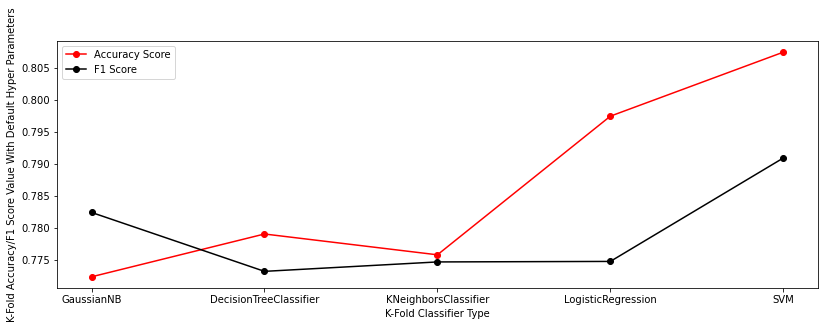

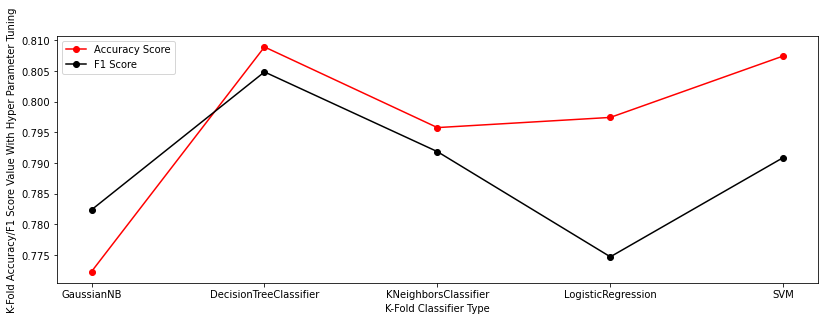

In [16]:
plt.figure(figsize=(30,10))
kf = plt.subplot(2,2,1)

kf.set_xlabel("K-Fold Classifier Type")
kf.set_ylabel("K-Fold Accuracy/F1 Score Value With Default Hyper Parameters")

kf.plot(names, avals, label="Accuracy Score", color="red", marker='o')
kf.plot(names, fvals, label="F1 Score", color="black", marker='o')

plt.legend()
plt.show()

plt.figure(figsize=(30,10))
kf = plt.subplot(2,2,2)

kf.set_xlabel("K-Fold Classifier Type")
kf.set_ylabel("K-Fold Accuracy/F1 Score Value With Hyper Parameter Tuning")

kf.plot(names_tuned, avals_tuned, label="Accuracy Score", color="red", marker='o')
kf.plot(names_tuned, fvals_tuned, label="F1 Score", color="black", marker='o')

plt.legend()
plt.show()

### Question 5

In [17]:
X_test = pd.read_csv("X_test.csv")
imputeX(X_test)
labelAll(X_test,labelingColumns)
X_test = X_test.drop(X_test.columns[[8,9]], axis = 1)
scaler = preprocessing.Normalizer()
scalerX_test = scaler.fit(X_test)
X_test = scalerX_test.transform(X_test)

model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)
model.fit(X,np.ravel(y,order='C'))
prediction = model.predict(X_test)
pd.DataFrame(prediction).to_csv("170_classes_problem_census.txt", index=False, header=False)

0        3
1        2
2        2
3        2
4        2
        ..
14742    2
14743    2
14744    5
14745    1
14746    4
Name: workclass, Length: 14747, dtype: object
0        15
1         2
2        15
3        11
4        15
         ..
14742     7
14743     7
14744    11
14745    11
14746    15
Name: education, Length: 14747, dtype: object
0        6
1        4
2        2
3        6
4        2
        ..
14742    2
14743    4
14744    4
14745    2
14746    2
Name: marital-status, Length: 14747, dtype: object
0         3
1         5
2         2
3         0
4        11
         ..
14742     3
14743     3
14744     7
14745     3
14746     4
Name: occupation, Length: 14747, dtype: object
0        4
1        3
2        0
3        1
4        0
        ..
14742    0
14743    1
14744    1
14745    0
14746    0
Name: relationship, Length: 14747, dtype: object
0        4
1        4
2        3
3        4
4        4
        ..
14742    4
14743    4
14744    2
14745    4
14746    4
Name: race, L